# Portfolio Risk Management

In [ ]:
# get stock data, EDA, changes per day, correlation of current 5 days changes and changes in 5 days, Annualized mean and 
#variance, skewness and kurtosis

### If you want some background knowledge about this exercise link [here//only Chinese version](https://kopu.chat/2017/05/28/%E5%8D%81%E5%88%86%E9%90%98%E8%AE%80%E6%87%82%E7%90%86%E8%B2%A1%E6%8A%95%E8%B3%87%E5%AD%B8-%E4%BB%80%E9%BA%BC%E6%98%AF%E6%9C%80%E5%A5%BD%E7%9A%84%E6%8A%95%E8%B3%87%E7%B5%84%E5%90%88%EF%BC%9F/)


In [1]:
import pandas as pd
import numpy as np
import ssl
from pandas_datareader import data, wb
import matplotlib.pyplot as plt
from pandas.util.testing import assert_frame_equal
import datetime as dt
import pandas_datareader.data as web
ssl._create_default_https_context = ssl._create_unverified_context

pd.set_option('display.max_columns', None)

pd.set_option('display.max_rows',30)

pd.set_option('max_colwidth',100)

ssl._create_default_https_context = ssl._create_unverified_context

pd.set_option('display.max_columns', None)

pd.set_option('display.max_rows', None)

pd.set_option('max_colwidth',100)

## Extract stock info from Yahoo

In [2]:
# set the time period you need
start=dt.datetime(2015,1,1)
end=dt.datetime.today()

#set the stocks you want
stocks=['AAPL','TSLA','IBM']

df=web.DataReader(stocks,'yahoo',start,end)
df.head(10)

Attributes   Adj Close                               Close              \
Symbols           AAPL         IBM        TSLA        AAPL         IBM   
Date                                                                     
2015-01-02  100.216454  129.241516  219.309998  109.330002  162.059998   
2015-01-05   97.393181  127.207932  210.089996  106.250000  159.509995   
2015-01-06   97.402374  124.464600  211.279999  106.260002  156.070007   
2015-01-07   98.768150  123.651100  210.949997  107.750000  155.050003   
2015-01-08  102.563072  126.338654  210.619995  111.889999  158.419998   
2015-01-09  102.673050  126.888924  206.660004  112.010002  159.110001   
2015-01-12  100.143120  124.759621  202.210007  109.250000  156.440002   
2015-01-13  101.032280  125.054688  204.250000  110.220001  156.809998   
2015-01-14  100.647285  124.249229  192.690002  109.800003  155.800003   
2015-01-15   97.915672  123.268295  191.869995  106.820000  154.570007   

Attributes                    High                                 Low  \
Symbols           TSLA        AAPL         IBM        TSLA        AAPL   
Date                                                                     
2015-01-02  219.309998  111.440002  163.309998  223.250000  107.349998   
2015-01-05  210.089996  108.650002  161.270004  216.500000  105.410004   
2015-01-06  211.279999  107.430000  159.960007  214.199997  104.629997   
2015-01-07  210.949997  108.199997  157.199997  214.779999  106.699997   
2015-01-08  210.619995  112.150002  159.039993  213.800003  108.699997   
2015-01-09  206.660004  113.250000  160.339996  209.979996  110.209999   
2015-01-12  202.210007  112.629997  159.250000  204.470001  108.800003   
2015-01-13  204.250000  112.800003  159.970001  207.610001  108.910004   
2015-01-14  192.690002  110.489998  156.490005  195.199997  108.500000   
2015-01-15  191.869995  110.059998  156.970001  195.750000  106.660004   

Attributes                                Open                          \
Symbols            IBM        TSLA        AAPL         IBM        TSLA   
Date                                                                     
2015-01-02  161.000000  213.259995  111.389999  161.309998  222.869995   
2015-01-05  159.190002  207.160004  108.290001  161.270004  214.550003   
2015-01-06  155.169998  204.210007  106.540001  159.669998  210.059998   
2015-01-07  154.029999  209.779999  107.199997  157.199997  213.350006   
2015-01-08  155.550003  210.009995  109.230003  156.240005  212.809998   
2015-01-09  157.250000  204.960007  112.669998  158.419998  208.919998   
2015-01-12  155.759995  199.250000  112.599998  159.000000  203.050003   
2015-01-13  155.679993  200.910004  111.430000  157.259995  203.320007   
2015-01-14  153.740005  185.000000  109.040001  154.860001  185.830002   
2015-01-15  154.160004  190.000000  110.000000  156.690002  194.490005   

Attributes      Volume                         
Symbols           AAPL        IBM        TSLA  
Date                                           
2015-01-02  53204600.0  5525500.0   4764400.0  
2015-01-05  64285500.0  4880400.0   5368500.0  
2015-01-06  65797100.0  6146700.0   6261900.0  
2015-01-07  40105900.0  4701800.0   2968400.0  
2015-01-08  59364500.0  4236800.0   3442500.0  
2015-01-09  53699500.0  4488300.0   4668300.0  
2015-01-12  49650800.0  4187600.0   5950300.0  
2015-01-13  67091900.0  4377500.0   4477300.0  
2015-01-14  48956600.0  4690300.0  11551900.0  
2015-01-15  60014000.0  4248400.0   5216500.0

## learn your data

In [3]:
print(df.index)
print(df.columns)

print(df.shape)

print(df.info())

print(df.describe())

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2020-04-03', '2020-04-06', '2020-04-07', '2020-04-08',
               '2020-04-09', '2020-04-13', '2020-04-14', '2020-04-15',
               '2020-04-16', '2020-04-17'],
              dtype='datetime64[ns]', name='Date', length=1332, freq=None)
MultiIndex(levels=[['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], ['AAPL', 'IBM', 'TSLA']],
           labels=[[0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5], [0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2]],
           names=['Attributes', 'Symbols'])
(1332, 18)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1332 entries, 2015-01-02 to 2020-04-17
Data columns (total 18 columns):
(Adj Close, AAPL)    1332 non-null float64
(Adj Close, IBM)     1332 non-null float64
(Adj Close, TSLA)    1332 non-null 

## Calculate the daily returns of the adjusted close price

In [4]:
Return=pd.DataFrame(df['Adj Close'].pct_change()*100)
Return.head(10)

Symbols,AAPL,IBM,TSLA
Date,,,
2015-01-02,NaN,NaN,NaN
2015-01-05,-2.817175,-1.573476,-4.204095
2015-01-06,0.009439,-2.156573,0.566425
2015-01-07,1.402200,-0.653599,-0.156192
2015-01-08,3.842253,2.173497,-0.156436
2015-01-09,0.107229,0.435552,-1.880159
2015-01-12,-2.464064,-1.678084,-2.153294
2015-01-13,0.887889,0.236508,1.008849
2015-01-14,-0.381061,-0.644085,-5.659730


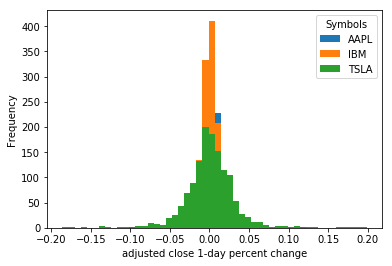

In [5]:
# Histogram of the daily price change percent of Adj_Close 
df['Adj Close'].pct_change().plot.hist(bins=50)  # pct_change is useful for analyzing stock
plt.xlabel('adjusted close 1-day percent change')
plt.show()

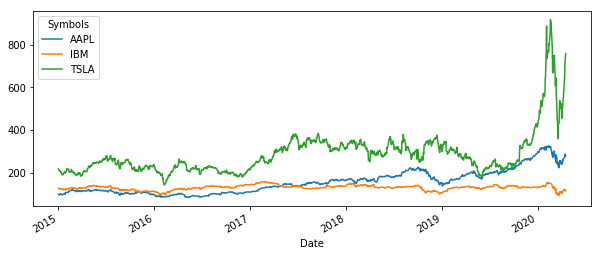

In [6]:
df['Adj Close'].plot(legend=True, figsize=(10,4))
plt.show()

## Annualizing mean//variance


In [7]:
#Average Annualized Return=((1+μ)**252)−1
daily=Return.mean()
print(daily,'/n')
annual=((1+daily)**252)-1
annual

Symbols
AAPL    0.093380
IBM     0.005172
TSLA    0.145740
dtype: float64 /n


Symbols
AAPL    5.892803e+09
IBM     2.669474e+00
TSLA    7.757054e+14
dtype: float64

In [8]:
# daily*sqrt(# of day)
sigma_daily = Return.std()
print('daily_std',sigma_daily,'/n')
# Calculate the daily variance
variance_daily = sigma_daily**2
print('daily_var',variance_daily,'/n')

sigma_annualized = sigma_daily*np.sqrt(252)
print('annualized_std',sigma_annualized,'/n')

# Calculate the annualized variance
variance_annualized = sigma_annualized**2
print('annualized_var',variance_annualized)

daily_std Symbols
AAPL    1.796913
IBM     1.544982
TSLA    3.246902
dtype: float64 /n
daily_var Symbols
AAPL     3.228895
IBM      2.386969
TSLA    10.542374
dtype: float64 /n
annualized_std Symbols
AAPL    28.525104
IBM     24.525825
TSLA    51.542976
dtype: float64 /n
annualized_var Symbols
AAPL     813.681583
IBM      601.516105
TSLA    2656.678371
dtype: float64


## Whether the changes in 5 days follow the trend of current changes

In [9]:
change5=pd.DataFrame(df['Adj Close'].shift(-5))
change5.tail(10)

Symbols,AAPL,IBM,TSLA
Date,,,
2020-04-03,273.250000,121.150002,650.950012
2020-04-06,287.049988,123.910004,709.890015
2020-04-07,284.429993,118.690002,729.830017
2020-04-08,286.690002,115.730003,745.210022
2020-04-09,279.950012,118.050003,757.750000
2020-04-13,NaN,NaN,NaN
2020-04-14,NaN,NaN,NaN
2020-04-15,NaN,NaN,NaN
2020-04-16,NaN,NaN,NaN


In [10]:
change5pct=pd.DataFrame(change5.pct_change(5))
change5pct.head(10)

Symbols,AAPL,IBM,TSLA
Date,,,
2015-01-02,NaN,NaN,NaN
2015-01-05,NaN,NaN,NaN
2015-01-06,NaN,NaN,NaN
2015-01-07,NaN,NaN,NaN
2015-01-08,NaN,NaN,NaN
2015-01-09,-0.053745,-0.012382,-0.065760
2015-01-12,-0.004851,0.003260,-0.050838
2015-01-13,-0.006079,-0.030100,-0.037601
2015-01-14,0.023679,-0.002632,0.046344


In [11]:
changein5=pd.DataFrame(df['Adj Close'].pct_change(5))
changein5.head(10)

Symbols,AAPL,IBM,TSLA
Date,,,
2015-01-02,NaN,NaN,NaN
2015-01-05,NaN,NaN,NaN
2015-01-06,NaN,NaN,NaN
2015-01-07,NaN,NaN,NaN
2015-01-08,NaN,NaN,NaN
2015-01-09,0.024513,-0.018203,-0.057681
2015-01-12,0.028235,-0.019247,-0.037508
2015-01-13,0.037267,0.004741,-0.033273
2015-01-14,0.019026,0.004837,-0.086561


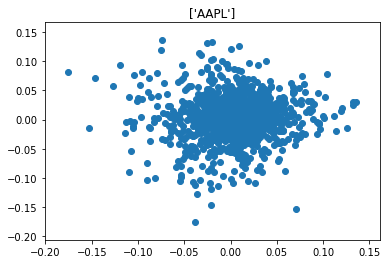

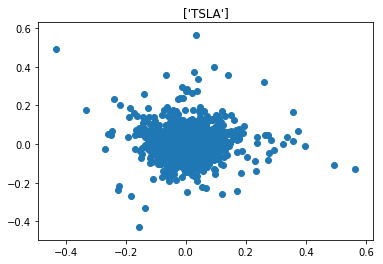

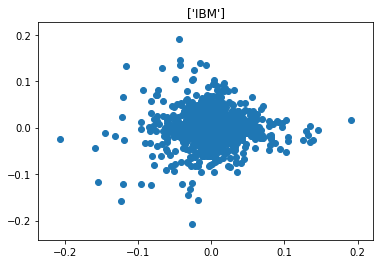

<Figure size 432x288 with 0 Axes>

In [12]:
for i in ['AAPL','TSLA','IBM']:
 plt.scatter(changein5[i],change5pct[i])
 plt.title([i])
 plt.show()
 plt.clf()

In [19]:
for i in ['AAPL','TSLA','IBM']:
  new=pd.concat([changein5[i],change5pct[i]],axis=1)
  print(new.head(10))

                AAPL      AAPL
Date                          
2015-01-02       NaN       NaN
2015-01-05       NaN       NaN
2015-01-06       NaN       NaN
2015-01-07       NaN       NaN
2015-01-08       NaN       NaN
2015-01-09  0.024513 -0.053745
2015-01-12  0.028235 -0.004851
2015-01-13  0.037267 -0.006079
2015-01-14  0.019026  0.023679
2015-01-15 -0.045313  0.057667
                TSLA      TSLA
Date                          
2015-01-02       NaN       NaN
2015-01-05       NaN       NaN
2015-01-06       NaN       NaN
2015-01-07       NaN       NaN
2015-01-08       NaN       NaN
2015-01-09 -0.057681 -0.065760
2015-01-12 -0.037508 -0.050838
2015-01-13 -0.033273 -0.037601
2015-01-14 -0.086561  0.046344
2015-01-15 -0.089023  0.049096
                 IBM       IBM
Date                          
2015-01-02       NaN       NaN
2015-01-05       NaN       NaN
2015-01-06       NaN       NaN
2015-01-07       NaN       NaN
2015-01-08       NaN       NaN
2015-01-09 -0.018203 -0.012382
2015-01-

## Skewness Kurtosis

In [20]:
# Import skew from scipy.stats
from scipy.stats import skew

# Drop the missing values
clean_returns = Return.dropna()

clean_returns.head(10)

Symbols,AAPL,IBM,TSLA
Date,,,
2015-01-05,-2.817175,-1.573476,-4.204095
2015-01-06,0.009439,-2.156573,0.566425
2015-01-07,1.402200,-0.653599,-0.156192
2015-01-08,3.842253,2.173497,-0.156436
2015-01-09,0.107229,0.435552,-1.880159
2015-01-12,-2.464064,-1.678084,-2.153294
2015-01-13,0.887889,0.236508,1.008849
2015-01-14,-0.381061,-0.644085,-5.659730
2015-01-15,-2.714046,-0.789489,-0.425558


In [21]:
# Calculate the third moment (skewness) of the returns distribution
returns_skewness = skew(clean_returns)
returns_skewness
#

array([-0.13075501, -0.26400518,  0.27563908])

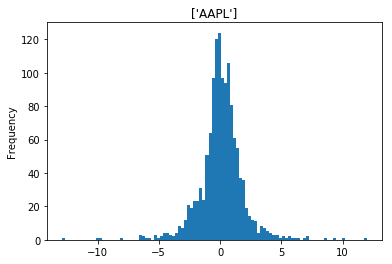

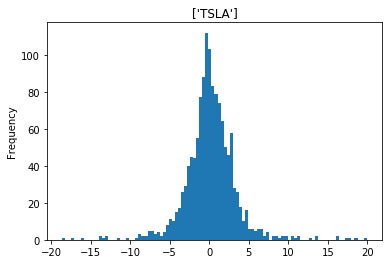

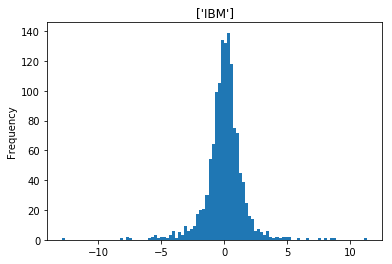

<Figure size 432x288 with 0 Axes>

In [27]:
for i in ['AAPL','TSLA','IBM']:
 clean_returns[i].plot.hist(bins=100)
 plt.title([i])
 plt.show()
 plt.clf()

In [29]:
# Import kurtosis from scipy.stats
from scipy.stats import kurtosis

# Calculate the excess kurtosis of the returns distribution
excess_kurtosis = kurtosis(Return.dropna())
print(excess_kurtosis)

# Derive the true fourth moment of the returns distribution
fourth_moment = excess_kurtosis+3
print(fourth_moment)

[ 7.64096738 10.86828555  7.05158717]
[10.64096738 13.86828555 10.05158717]
